<a href="https://colab.research.google.com/github/mighty-mass/ai-engineer-course/blob/main/DeepLearning/VisionTechSolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Riconoscimento di animali per auto a guida autonoma
VisionTech Solutions vuole sviluppare un sistema di riconoscimento automatico delle immagini per distinguere tra veicoli e animali, con l'obiettivo di ottimizzare le operazioni di monitoraggio della fauna nelle aree urbane, evitando incidenti stradali e proteggendo sia gli animali che i veicoli.

VisionTech Solutions collabora con le amministrazioni comunali per implementare un sistema di monitoraggio in tempo reale nelle città, utilizzando telecamere installate lungo le strade per identificare e classificare veicoli e animali. Questo sistema aiuterà a prevenire incidenti stradali causati dall'attraversamento improvviso di animali, avvisando i guidatori tramite segnali stradali elettronici.

Benefici:

1. Automazione dei Processi:
- Riduzione del tempo e delle risorse per monitorare manualmente le aree urbane.
- Rilevamento automatico e in tempo reale di animali e veicoli.
2. Aumento della Precisione:
- Utilizzo di una rete neurale convoluzionale (CNN) per garantire alta precisione nella classificazione delle immagini.
- Minimizzazione degli errori umani.
3. Efficienza Operativa:
- Processamento rapido e accurato di grandi volumi di dati, migliorando la risposta agli eventi.
- Maggiore sicurezza per i cittadini e riduzione dei danni ai veicoli.
4. Applicazioni Multiple:
- Sorveglianza e monitoraggio del traffico.
- Analisi del comportamento animale nelle aree urbane.
- Utilizzo dei dati per migliorare le politiche di sicurezza stradale.

## Dettagli del Progetto:

1. Dataset:
- Utilizzo del dataset CIFAR, contenente migliaia di immagini etichettate in varie categorie, inclusi veicoli e animali.
2. Algoritmo:
- Implementazione di una rete neurale convoluzionale (CNN) per l'analisi e la classificazione delle immagini.
3. Output:
- Il sistema classificherà correttamente ogni immagine come veicolo o animale.

## Valutazione del Modello:

- **Accuratezza**: Proporzione di immagini classificate correttamente rispetto al totale.
- **Precisione**: Qualità delle predizioni positive, indicando la proporzione di immagini correttamente identificate.

## Analisi dei Risultati:

- Identificazione di eventuali pattern di errore.
- Valutazione delle categorie di immagini confuse sistematicamente.
- Esame delle immagini errate e riflessione su possibili migliorie al modello.

## Risultato Finale:

- Presentazione completa della rete neurale convoluzionale e delle sue capacità di discriminazione tra veicoli e animali.
- Discussione dettagliata delle metriche utilizzate e un'analisi critica delle prestazioni e limitazioni del modello.

Questo progetto fornirà a VisionTech Solutions un sistema efficace per migliorare la sicurezza stradale e la gestione della fauna nelle aree urbane, dimostrando le competenze pratiche nell'applicazione del machine learning al riconoscimento delle immagini.

In [31]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from IPython.display import Image
import seaborn as sns
import pandas as pd
import os
import time

Le classi di CIFAR-10 sono:
* 0: aereo
* 1: automobile
* 2: uccello
* 3: gatto
* 4: cervo,
* 5: cane
* 6: rana
* 7: cavallo
* 8: nave
* 9: camion
    
Mappiamo le classi originali a classi binarie:
- Veicoli (0): aereo (0), automobile (1), nave (8), camion (9)
- Animali (1): uccello (2), gatto (3), cervo (4), cane (5), rana (6), cavallo (7)

In [32]:
def load_and_prepare_cifar10():
    """
    Carica e prepara il dataset CIFAR-10, selezionando solo le classi di interesse:
    - Veicoli: automobile, camion, nave, aereo
    - Animali: uccello, gatto, cervo, cane, rana, cavallo
    """
    print("Caricamento del dataset CIFAR-10...")
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # Creazione della mappa delle classi
    class_mapping = {
        0: 0,  # aereo -> veicolo
        1: 0,  # automobile -> veicolo
        2: 1,  # uccello -> animale
        3: 1,  # gatto -> animale
        4: 1,  # cervo -> animale
        5: 1,  # cane -> animale
        6: 1,  # rana -> animale
        7: 1,  # cavallo -> animale
        8: 0,  # nave -> veicolo
        9: 0   # camion -> veicolo
    }

    # Applicazione della mappatura
    y_train_binary = np.array([class_mapping[y[0]] for y in y_train])
    y_test_binary = np.array([class_mapping[y[0]] for y in y_test])

    # Separazione degli indici di validazione dal set di addestramento
    x_train, x_val, y_train_binary, y_val_binary = train_test_split(
        x_train, y_train_binary, test_size=0.2, random_state=42, stratify=y_train_binary
    )

    # Normalizzazione dei dati (0-255 -> 0-1)
    x_train = x_train.astype('float32') / 255.0
    x_val = x_val.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # One-hot encoding per le etichette (anche se sono binarie)
    y_train_binary = to_categorical(y_train_binary, 2)
    y_val_binary = to_categorical(y_val_binary, 2)
    y_test_binary = to_categorical(y_test_binary, 2)

    class_names = ['Veicolo', 'Animale']

    print(f"Dati preparati. Forma dei dati:")
    print(f"  Train: {x_train.shape} con {len(y_train_binary)} etichette")
    print(f"  Validation: {x_val.shape} con {len(y_val_binary)} etichette")
    print(f"  Test: {x_test.shape} con {len(y_test_binary)} etichette")

    return (x_train, y_train_binary), (x_val, y_val_binary), (x_test, y_test_binary), class_names

load_and_prepare_cifar10()

Caricamento del dataset CIFAR-10...
Dati preparati. Forma dei dati:
  Train: (40000, 32, 32, 3) con 40000 etichette
  Validation: (10000, 32, 32, 3) con 10000 etichette
  Test: (10000, 32, 32, 3) con 10000 etichette


((array([[[[0.09803922, 0.07843138, 0.10196079],
           [0.09803922, 0.07843138, 0.10196079],
           [0.09411765, 0.07450981, 0.09803922],
           ...,
           [0.07450981, 0.05882353, 0.0627451 ],
           [0.07450981, 0.05882353, 0.07450981],
           [0.07450981, 0.05490196, 0.07843138]],
  
          [[0.09411765, 0.07450981, 0.09803922],
           [0.09411765, 0.07450981, 0.09803922],
           [0.09411765, 0.07450981, 0.09803922],
           ...,
           [0.06666667, 0.05490196, 0.06666667],
           [0.07058824, 0.05098039, 0.07450981],
           [0.07058824, 0.05098039, 0.07450981]],
  
          [[0.09019608, 0.07058824, 0.09411765],
           [0.09019608, 0.07058824, 0.09411765],
           [0.09411765, 0.07450981, 0.09803922],
           ...,
           [0.0627451 , 0.05882353, 0.07450981],
           [0.07058824, 0.05098039, 0.07450981],
           [0.07058824, 0.05098039, 0.07450981]],
  
          ...,
  
          [[0.32156864, 0.19215687, 0.16

In [33]:
def create_data_generators(x_train, y_train):
    """
    Crea i generatori di dati per data augmentation durante l'addestramento.
    """
    print("Creazione dei generatori di dati con data augmentation...")

    # Generatore per data augmentation sul training set
    train_datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    train_generator = train_datagen.flow(
        x_train,
        y_train,
        batch_size=32
    )

    return train_generator

In [34]:
def visualize_augmented_samples(x_train, y_train, class_names):
    """
    Visualizza esempi di data augmentation per verificare la trasformazione.
    """
    train_datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Prendi solo alcune immagini di esempio
    sample_images = x_train[:5]
    sample_labels = y_train[:5]

    # Genera alcune immagini aumentate
    aug_iter = train_datagen.flow(sample_images, sample_labels, batch_size=1)

    plt.figure(figsize=(15, 5))
    for i in range(5):
        # Immagine originale
        plt.subplot(2, 5, i+1)
        plt.imshow(sample_images[i])
        plt.title(f"Orig: {class_names[np.argmax(sample_labels[i])]}")
        plt.axis('off')

        # Immagine aumentata
        aug_img = next(aug_iter)[0][0]
        plt.subplot(2, 5, i+6)
        plt.imshow(aug_img)
        plt.title("Aumentata")
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('data_augmentation_examples.png')
    plt.close()
    print("Esempi di data augmentation salvati in 'data_augmentation_examples.png'")
    Image('data_augmentation_examples.png')


In [35]:
# Imposta la riproducibilità
tf.random.set_seed(42)
np.random.seed(42)

(x_train, y_train), (x_val, y_val), (x_test, y_test), class_names = load_and_prepare_cifar10()
train_generator = create_data_generators(x_train, y_train)
visualize_augmented_samples(x_train, y_train, class_names)

Caricamento del dataset CIFAR-10...
Dati preparati. Forma dei dati:
  Train: (40000, 32, 32, 3) con 40000 etichette
  Validation: (10000, 32, 32, 3) con 10000 etichette
  Test: (10000, 32, 32, 3) con 10000 etichette
Creazione dei generatori di dati con data augmentation...
Esempi di data augmentation salvati in 'data_augmentation_examples.png'


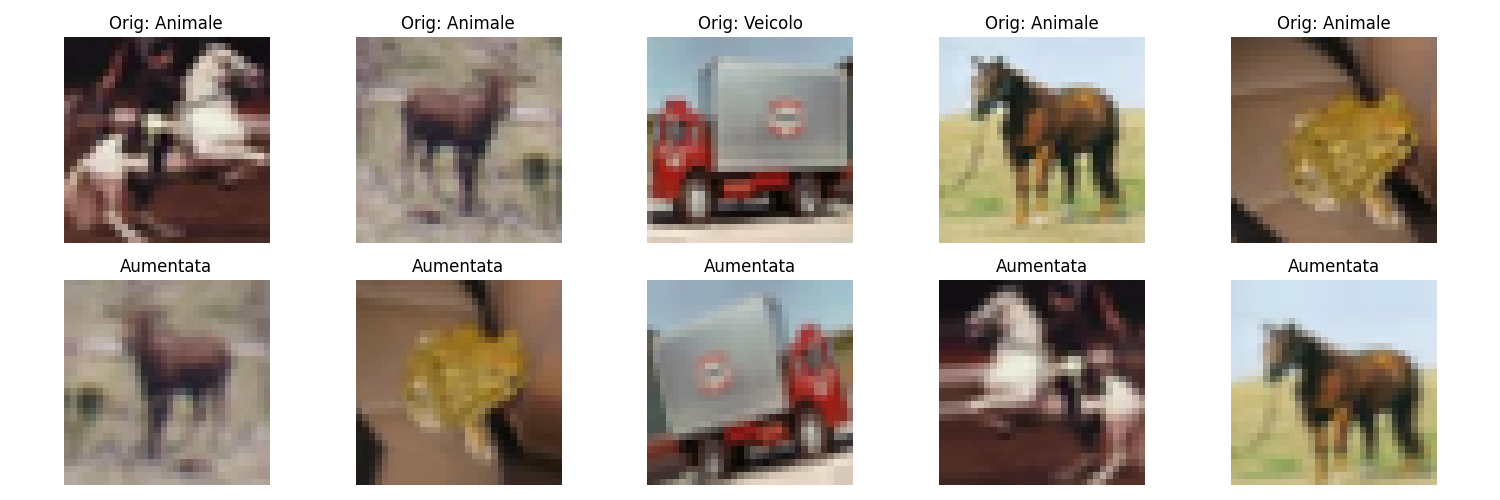

In [36]:
Image('data_augmentation_examples.png')

Re-usable create CNN function

In [37]:
def create_cnn_model(input_shape=(32, 32, 3)):
    """
    Crea un modello CNN per la classificazione binaria veicoli/animali
    """
    print("Creazione del modello CNN...")

    # Definiamo l'input layer esplicitamente
    inputs = keras.Input(shape=input_shape)

    # Primo blocco convoluzionale
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.2)(x)

    # Secondo blocco convoluzionale
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.3)(x)

    # Terzo blocco convoluzionale
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.4)(x)

    # Livelli completamente connessi
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(2, activation='softmax')(x)  # Output binario: veicolo o animale

    # Creazione del modello utilizzando il modello funzionale API
    model = keras.Model(inputs=inputs, outputs=outputs, name="vehicle_animal_classifier")

    # Compilazione del modello
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    model.summary()

    return model

Train Model

In [38]:
def train_model(model, train_generator, x_val, y_val, epochs=20):
    """
    Addestra il modello CNN con i dati preparati
    """
    print("Inizio addestramento del modello...")

    # Callback per salvare il miglior modello durante l'addestramento
    checkpoint_filepath = 'best_model_vehicle_animal.h5'
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True
    )

    # Callback per early stopping se non ci sono miglioramenti
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True
    )

    # Callback per ridurre il learning rate se non ci sono miglioramenti
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=0.00001
    )

    # Addestramento del modello
    start_time = time.time()

    steps_per_epoch = len(train_generator)

    history = model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=epochs,
        validation_data=(x_val, y_val),
        callbacks=[model_checkpoint_callback, early_stopping, reduce_lr]
    )

    training_time = time.time() - start_time
    print(f"Addestramento completato in {training_time:.2f} secondi")

    # Carica il miglior modello (se è stato salvato)
    if os.path.exists(checkpoint_filepath):
        print(f"Caricamento del miglior modello da: {checkpoint_filepath}")
        model = keras.models.load_model(checkpoint_filepath)

    return model, history

In [39]:
def visualize_training_history(history):
    """
    Visualizza i grafici dell'andamento dell'addestramento del modello
    """
    plt.figure(figsize=(12, 5))

    # Plot accuratezza
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuratezza del Modello')
    plt.ylabel('Accuratezza')
    plt.xlabel('Epoca')
    plt.legend(loc='lower right')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss del Modello')
    plt.ylabel('Loss')
    plt.xlabel('Epoca')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.close()
    print("Grafici di addestramento salvati in 'training_history.png'")


Estimated runtime: 8686.61 seconds (~2h 20m)

In [40]:
start = time.time()
model = create_cnn_model()
trained_model, history = train_model(model, train_generator, x_val, y_val)
visualize_training_history(history)
print(f"Tempo totale di addestramento: {time.time() - start:.2f} secondi")

Creazione del modello CNN...


Model: "vehicle_animal_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 256)            │         1,02

 Total params: 814,882 (3.11 MB)

 Trainable params: 813,474 (3.10 MB)

 Non-trainable params: 1,408 (5.50 KB)

Inizio addestramento del modello...
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.8252 - loss: 0.4680

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 445s 350ms/step - accuracy: 0.8252 - loss: 0.4679 - val_accuracy: 0.8569 - val_loss: 0.3459 - learning_rate: 0.0010
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 434s 344ms/step - accuracy: 0.8925 - loss: 0.2631 - val_accuracy: 0.8414 - val_loss: 0.3846 - learning_rate: 0.0010
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.9059 - loss: 0.2349

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 414s 331ms/step - accuracy: 0.9059 - loss: 0.2349 - val_accuracy: 0.8809 - val_loss: 0.3156 - learning_rate: 0.0010
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.9097 - loss: 0.2221

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 457s 344ms/step - accuracy: 0.9097 - loss: 0.2221 - val_accuracy: 0.9206 - val_loss: 0.2164 - learning_rate: 0.0010
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.9214 - loss: 0.2018

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 435s 348ms/step - accuracy: 0.9214 - loss: 0.2018 - val_accuracy: 0.9358 - val_loss: 0.1684 - learning_rate: 0.0010
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 413s 330ms/step - accuracy: 0.9310 - loss: 0.1815 - val_accuracy: 0.9294 - val_loss: 0.1795 - learning_rate: 0.0010
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 411s 329ms/step - accuracy: 0.9289 - loss: 0.1843 - val_accuracy: 0.9289 - val_loss: 0.1898 - learning_rate: 0.0010
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 436s 349ms/step - accuracy: 0.9317 - loss: 0.1723 - val_accuracy: 0.8782 - val_loss: 0.2851 - learning_rate: 0.0010
Epoch 9/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.9444 - loss: 0.1503

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 440s 348ms/step - accuracy: 0.9444 - loss: 0.1503 - val_accuracy: 0.9452 - val_loss: 0.1453 - learning_rate: 5.0000e-04
Epoch 10/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 423s 332ms/step - accuracy: 0.9442 - loss: 0.1450 - val_accuracy: 0.9390 - val_loss: 0.1528 - learning_rate: 5.0000e-04
Epoch 11/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.9459 - loss: 0.1430

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 461s 347ms/step - accuracy: 0.9459 - loss: 0.1430 - val_accuracy: 0.9572 - val_loss: 0.1143 - learning_rate: 5.0000e-04
Epoch 12/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 433s 346ms/step - accuracy: 0.9487 - loss: 0.1316 - val_accuracy: 0.9546 - val_loss: 0.1216 - learning_rate: 5.0000e-04
Epoch 13/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 437s 350ms/step - accuracy: 0.9488 - loss: 0.1305 - val_accuracy: 0.9527 - val_loss: 0.1307 - learning_rate: 5.0000e-04
Epoch 14/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.9511 - loss: 0.1277

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 421s 337ms/step - accuracy: 0.9511 - loss: 0.1277 - val_accuracy: 0.9582 - val_loss: 0.1146 - learning_rate: 5.0000e-04
Epoch 15/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.9544 - loss: 0.1195

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 434s 347ms/step - accuracy: 0.9544 - loss: 0.1195 - val_accuracy: 0.9610 - val_loss: 0.1020 - learning_rate: 2.5000e-04
Epoch 16/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.9592 - loss: 0.1066

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 437s 350ms/step - accuracy: 0.9592 - loss: 0.1066 - val_accuracy: 0.9632 - val_loss: 0.0985 - learning_rate: 2.5000e-04
Epoch 17/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 438s 347ms/step - accuracy: 0.9588 - loss: 0.1106 - val_accuracy: 0.9611 - val_loss: 0.1013 - learning_rate: 2.5000e-04
Epoch 18/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.9597 - loss: 0.1086

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 431s 338ms/step - accuracy: 0.9597 - loss: 0.1086 - val_accuracy: 0.9669 - val_loss: 0.0907 - learning_rate: 2.5000e-04
Epoch 19/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.9616 - loss: 0.1022

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 410s 328ms/step - accuracy: 0.9616 - loss: 0.1022 - val_accuracy: 0.9674 - val_loss: 0.0899 - learning_rate: 2.5000e-04
Epoch 20/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 468s 349ms/step - accuracy: 0.9592 - loss: 0.1068 - val_accuracy: 0.9609 - val_loss: 0.1051 - learning_rate: 2.5000e-04
Addestramento completato in 8685.56 secondi
Caricamento del miglior modello da: best_model_vehicle_animal.h5


Grafici di addestramento salvati in 'training_history.png'
Tempo totale di addestramento: 8686.61 secondi


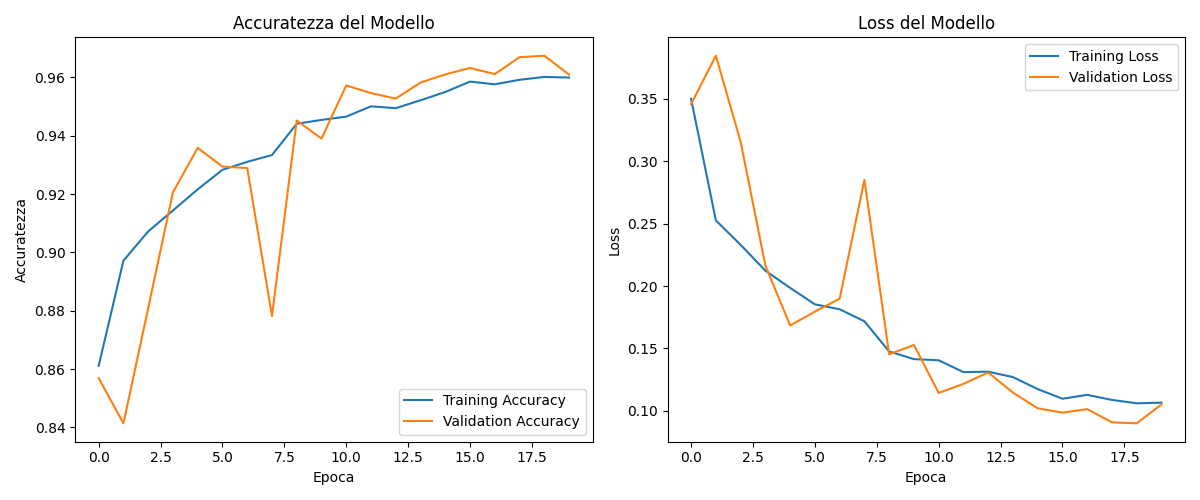

In [41]:
Image('training_history.png')

In [42]:
def evaluate_model(model, x_test, y_test, class_names):
    """
    Valuta il modello addestrato sul set di test
    """
    print("\nValutazione del modello sul set di test...")
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
    print(f"Test accuracy: {test_acc:.4f}")
    print(f"Test loss: {test_loss:.4f}")

    # Predizioni sul set di test
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calcola e visualizza la matrice di confusione
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predizione')
    plt.ylabel('Valore Reale')
    plt.title('Matrice di Confusione')
    plt.savefig('confusion_matrix.png')
    plt.close()
    print("Matrice di confusione salvata in 'confusion_matrix.png'")

    # Report di classificazione
    print("\nReport di classificazione:")
    print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

    # Salvare il report di classificazione come CSV
    report = classification_report(y_true_classes, y_pred_classes, target_names=class_names, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    df_report.to_csv('classification_report.csv')
    print("Report di classificazione salvato in 'classification_report.csv'")

    return y_pred, y_true_classes, y_pred_classes

In [43]:
def visualize_incorrect_predictions(x_test, y_true_classes, y_pred_classes, class_names, n=20):
    """
    Visualizza esempi di predizioni errate per l'analisi dell'errore
    """
    incorrect_indices = np.where(y_true_classes != y_pred_classes)[0]

    if len(incorrect_indices) == 0:
        print("Nessuna predizione errata trovata!")
        return

    # Limita il numero di immagini da visualizzare
    n = min(n, len(incorrect_indices))

    plt.figure(figsize=(20, n))
    for i, idx in enumerate(incorrect_indices[:n]):
        plt.subplot(n // 4 + 1, 4, i + 1)
        plt.imshow(x_test[idx])
        plt.title(f"Vero: {class_names[y_true_classes[idx]]}\nPred: {class_names[y_pred_classes[idx]]}")
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('incorrect_predictions.png')
    plt.close()
    print(f"Esempi di {n} predizioni errate salvate in 'incorrect_predictions.png'")

In [44]:
def analyze_class_activation_maps(model, x_test, y_true_classes, class_names, n=5):
    """
    Analizza le mappe di attivazione della classe per capire su quali parti
    dell'immagine il modello si sta concentrando per fare la predizione.
    """
    try:
        # Crea un modello che restituisce sia la predizione che l'ultima mappa di attivazione convoluzionale
        last_conv_layer_name = None
        for layer in reversed(model.layers):
            if isinstance(layer, layers.Conv2D):
                last_conv_layer_name = layer.name
                break

        if last_conv_layer_name is None:
            print("Nessun layer convoluzionale trovato nel modello.")
            return

        # Modello per estrarre le mappe di attivazione
        grad_model = tf.keras.models.Model(
            inputs=[model.inputs],
            outputs=[
                model.get_layer(last_conv_layer_name).output,
                model.output
            ]
        )

        # Seleziona alcune immagini
        selected_indices = np.random.choice(len(x_test), n, replace=False)

        plt.figure(figsize=(15, n * 3))
        for i, idx in enumerate(selected_indices):
            img = x_test[idx]
            img_array = np.expand_dims(img, axis=0)

            # Calcola le mappe di attivazione
            with tf.GradientTape() as tape:
                conv_outputs, predictions = grad_model(img_array)
                class_idx = y_true_classes[idx]
                loss = predictions[:, class_idx]

            # Estrai gli output dell'ultimo layer convoluzionale
            output = conv_outputs[0]

            # Crea una mappa di calore ponderata
            weights = tape.gradient(loss, conv_outputs)[0]
            cam = np.mean(output * weights[..., np.newaxis], axis=(0, 1))

            cam = np.maximum(cam, 0)  # ReLU
            heatmap = cam / np.max(cam)

            # Ridimensiona la mappa di calore alle dimensioni dell'immagine originale
            import cv2
            heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

            # Converti la mappa di calore in RGB
            heatmap = np.uint8(255 * heatmap)
            heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

            # Sovrapponi la mappa di calore all'immagine originale
            superimposed_img = heatmap * 0.4 + img * 255
            superimposed_img = np.clip(superimposed_img, 0, 255).astype('uint8')

            # Visualizza l'immagine originale e la mappa di calore
            plt.subplot(n, 2, i * 2 + 1)
            plt.imshow(img)
            plt.title(f"Originale: {class_names[class_idx]}")
            plt.axis('off')

            plt.subplot(n, 2, i * 2 + 2)
            plt.imshow(superimposed_img)
            plt.title("Mappa di Attivazione")
            plt.axis('off')

        plt.tight_layout()
        plt.savefig('class_activation_maps.png')
        plt.close()
        print("Mappe di attivazione delle classi salvate in 'class_activation_maps.png'")
    except Exception as e:
        print(f"Errore durante la generazione delle mappe di attivazione: {e}")

In [45]:
y_pred, y_true_classes, y_pred_classes = evaluate_model(trained_model, x_test, y_test, class_names)
visualize_incorrect_predictions(x_test, y_true_classes, y_pred_classes, class_names)
analyze_class_activation_maps(trained_model, x_test, y_true_classes, class_names)


Valutazione del modello sul set di test...
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step - accuracy: 0.9675 - loss: 0.0920
Test accuracy: 0.9672
Test loss: 0.0885
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step
Matrice di confusione salvata in 'confusion_matrix.png'

Report di classificazione:
              precision    recall  f1-score   support

     Veicolo       0.96      0.96      0.96      4000
     Animale       0.97      0.97      0.97      6000

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Report di classificazione salvato in 'classification_report.csv'
Esempi di 20 predizioni errate salvate in 'incorrect_predictions.png'
Errore durante la generazione delle mappe di attivazione: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Incompatible shapes: [8,8,128] vs. [8,8,128,1] [Op:Mul] name: 


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer_2']]
Received: inputs=Tensor(shape=(1, 32, 32, 3))
  warnings.warn(msg)


<Figure size 1500x1500 with 0 Axes>

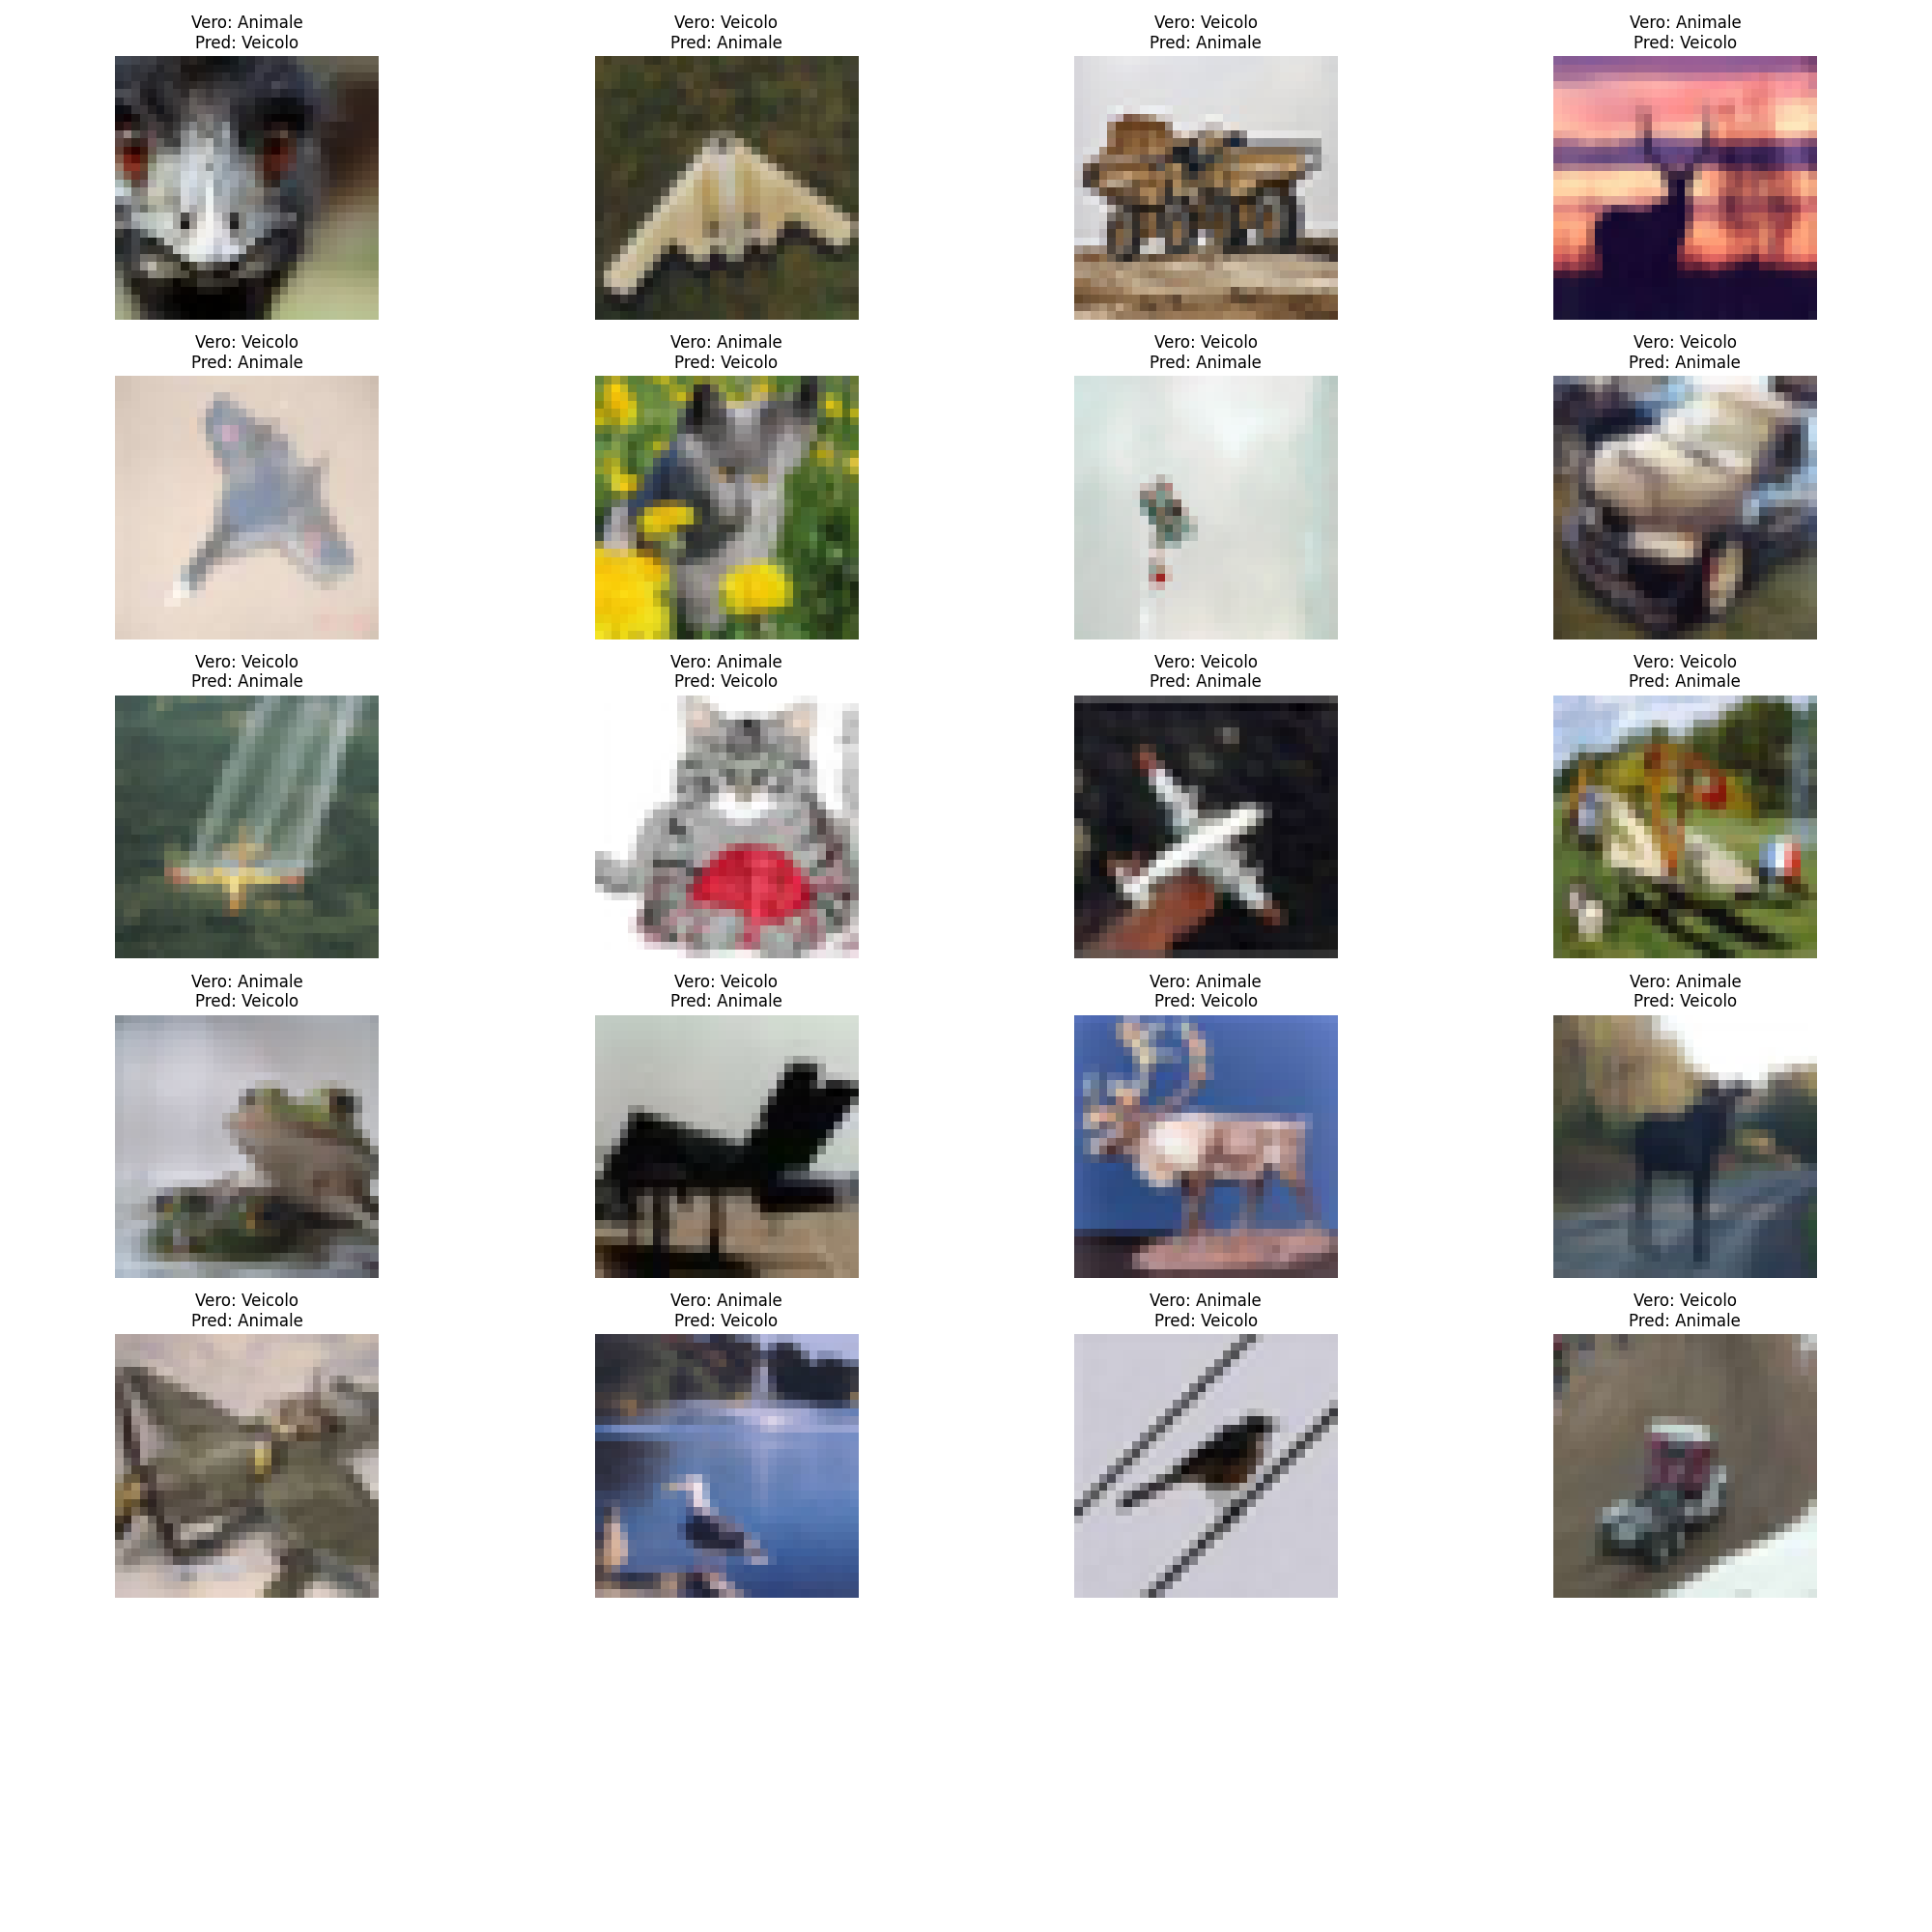

In [46]:
Image('class_activation_maps.png')
Image('incorrect_predictions.png')

In [47]:
trained_model.save('vehicle_animal_classifier_final.h5')
print("\nModello finale salvato come 'vehicle_animal_classifier_final.h5'")


Modello finale salvato come 'vehicle_animal_classifier_final.h5'


How to use a generated model